# Central Limit Theorem (CLT)

When sampling data, it is common to encounter the issue of non-normal data.

This may be for multiple reasons, such as the population not having a normal distribution or the sample being misrepresentative of the population.


The Central Limit Theorem postulates that if random samples of n observations are taken from a population that has a specific mean, μ, and standard deviation, σ, the sampling distribution constructed from the means of the randomly selected subsample distributions will approximate a normal distribution having roughly the same mean and standard deviation as the population.

In short, the distribution of sample means tend to follow the normal distribution.

### Examples with Python (CLT)

#### Example 1 (CLT) sampling from a normal distribution

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [154]:
rng = np.random.default_rng()
x = rng.normal(size=10000)

Text(0.5, 1.0, 'Normal distribution (CLT example 1)')

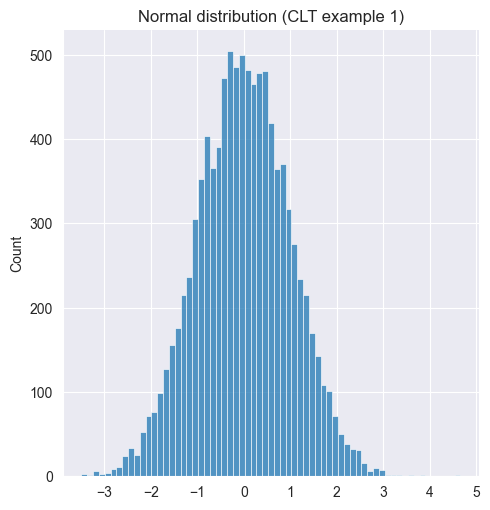

In [155]:
_ = sns.displot(x)
plt.title('Normal distribution (CLT example 1)')

In [156]:
x_sample = rng.choice(x, size=10, replace=False)
x_sample

array([ 1.26958623,  0.89189096,  0.76102007,  0.33448127,  0.64891156,
       -0.40834077,  0.3241159 , -1.16705242, -0.43666549, -1.42090766])

The mean isn't always going to be close to zero with such a small sample size:

In [78]:
np.mean(x_sample)

np.float64(0.34708844807512584)

In [157]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = rng.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))
    return sample_means

Text(0.5, 1.0, '10 samples of size 10')

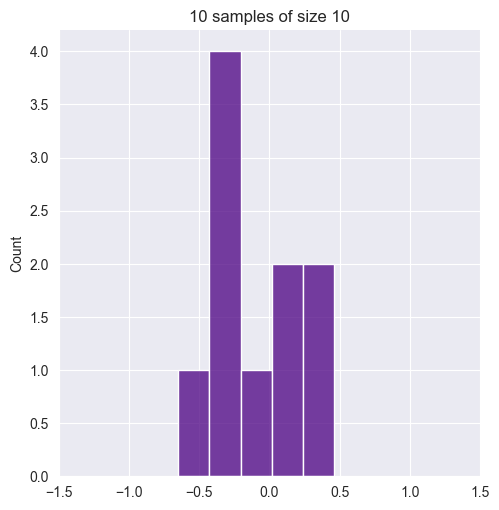

In [158]:
sns.displot(sample_mean_calculator(x, 10, 10), color='indigo')
_ = plt.xlim(-1.5, 1.5)
plt.title('10 samples of size 10')

Text(0.5, 1.0, '1000 samples of size 10')

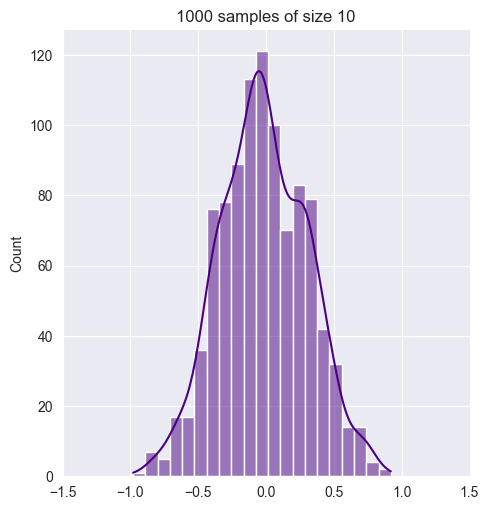

In [159]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='indigo', kde=True)
_ = plt.xlim(-1.5, 1.5)
plt.title('1000 samples of size 10')

The larger the sample size, the tighter the sample means will tend to be around the population mean:

Text(0.5, 1.0, '1000 samples of size 100')

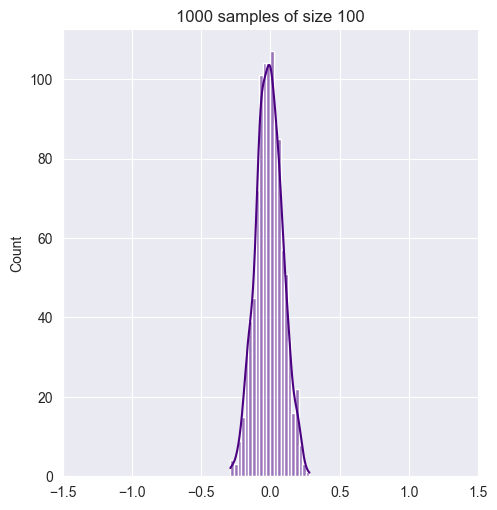

In [160]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='indigo', kde=True)
_ = plt.xlim(-1.5, 1.5)
plt.title('1000 samples of size 100')

Text(0.5, 1.0, '1000 samples of size 1000')

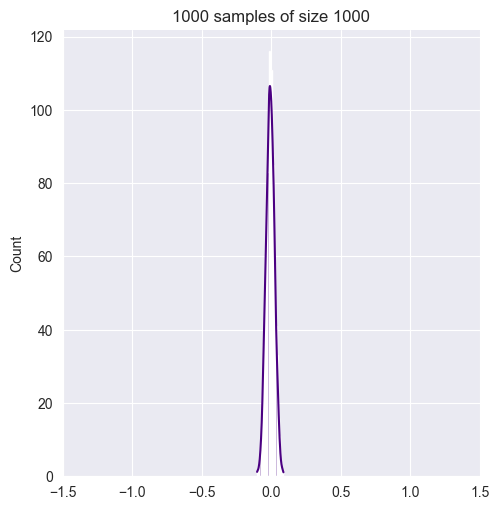

In [161]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='indigo', kde=True)
_ = plt.xlim(-1.5, 1.5)
plt.title('1000 samples of size 1000')

#### Example 2 (CLT) sampling from a skewed distribution

In [94]:
s = st.skewnorm.rvs(10, size=10000)

Text(0.5, 1.0, 'Positively skewed distribution')

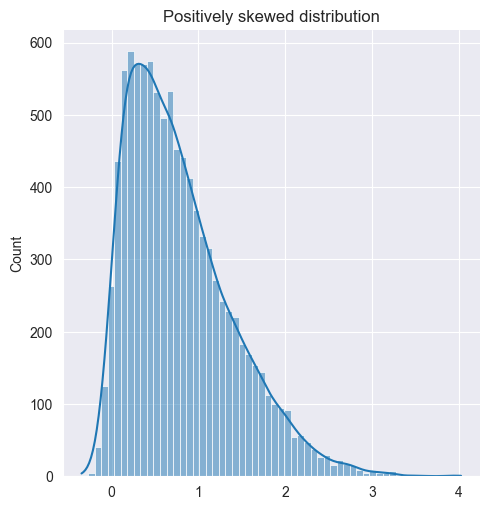

In [98]:
_ = sns.displot(s, kde=True)
plt.title('Positively skewed distribution')

Text(0.5, 1.0, '1000 samples of size 10')

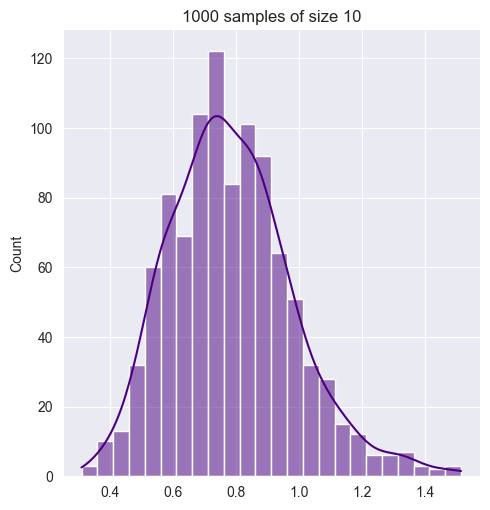

In [144]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color= 'indigo', kde=True)
plt.title('1000 samples of size 10')

Text(0.5, 1.0, '1000 samples of size 1000')

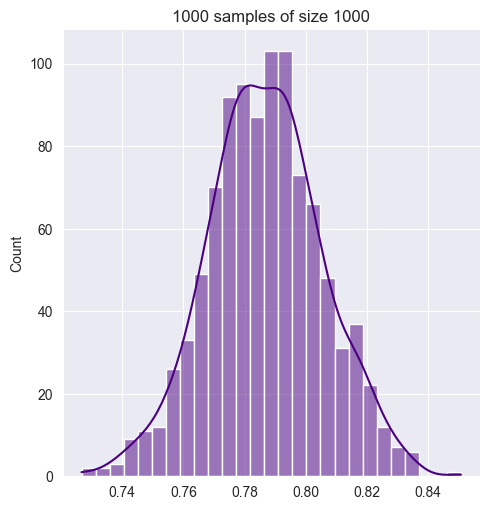

In [149]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000),color='indigo', kde=True)
plt.title('1000 samples of size 1000')

#### Example 3 (CLT) sampling from a multimodal distribution

In [99]:
# creates two normal distributions with 5000 data points:
# one standard normal distribution with mean 0 and the other 4

m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4, size=5000)))

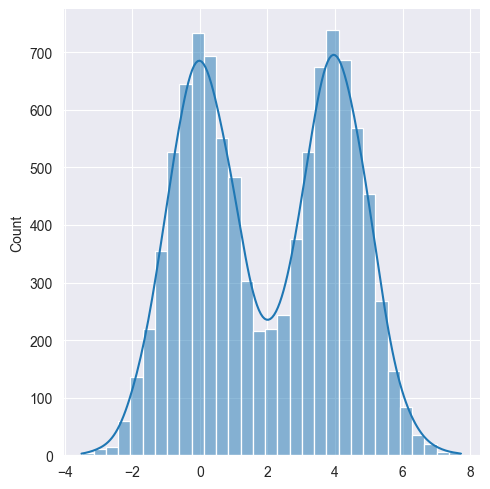

In [100]:
_ = sns.displot(m, kde=True)

In [102]:
np.mean(m)

np.float64(2.0137211443983682)

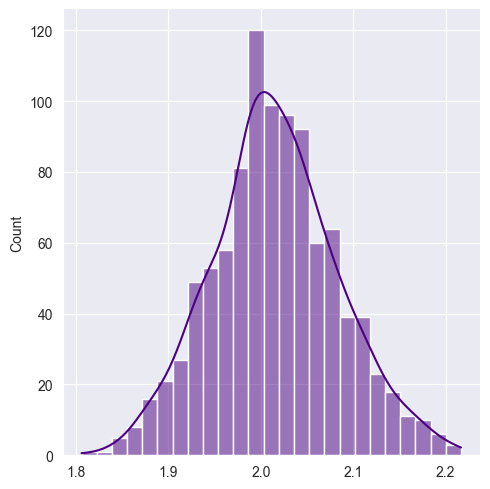

In [150]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000),color='indigo', kde=True)

#### Example 4 (CLT) sampling from a uniform distribution

In [162]:
u = rng.uniform(size=10000)

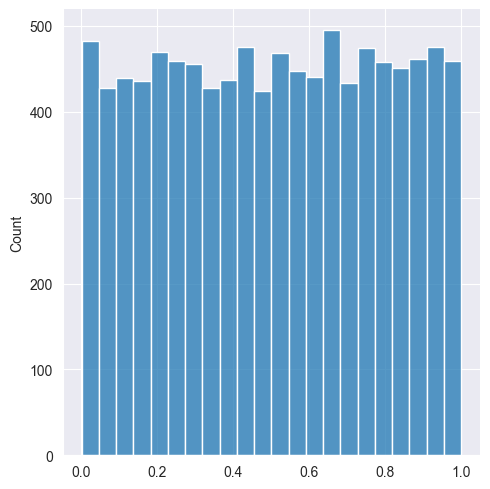

In [104]:
_ = sns.displot(u)

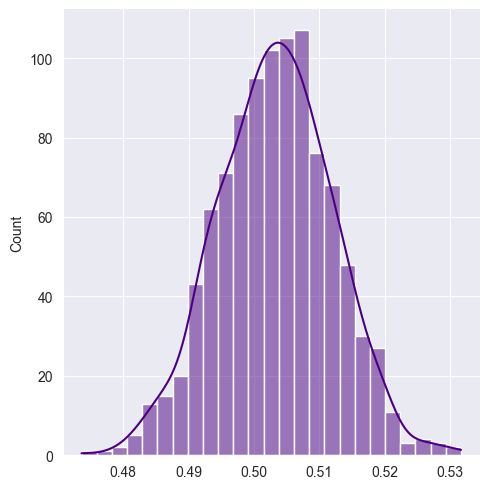

In [151]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000),color='indigo', kde=True)